<a href="https://colab.research.google.com/github/ccskying/PythonNotes/blob/master/BigData_HW2_KernelClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#1-2
import numpy as np
x=np.array([1,2])
y=np.array([1,3])
print(np.polyfit(x,y,1))

[ 2. -1.]


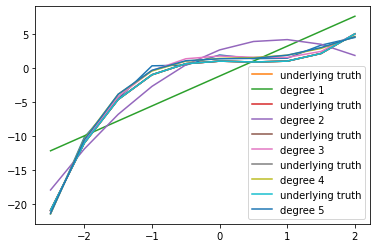

In [0]:
#1-3
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


noise = np.random.normal(0,1,10)
x=(np.arange(10)-5)/2
y=np.power(x,3)-np.power(x,2)+1+noise
plt.plot(x,y)

y_truth = np.power(x,3)-np.power(x,2)+1
p = np.polyfit(x,y,1)
mapping_1 = np.array([np.power(x,1) , 1])
y_1 = mapping_1.T @ p
plt.plot(x,y_truth,label='underlying truth')
plt.plot(x,y_1,label='degree 1')
plt.legend()

p = np.polyfit(x,y,2)
mapping_2 = np.array([np.power(x,2), np.power(x,1) , 1])
y_2 = mapping_2.T @ p
plt.plot(x,y_truth,label='underlying truth')
plt.plot(x,y_2,label='degree 2')
plt.legend()

p = np.polyfit(x,y,3)
mapping_3 = np.array([np.power(x,3), np.power(x,2), np.power(x,1) , 1])
y_3 = mapping_3.T @ p
plt.plot(x,y_truth,label='underlying truth')
plt.plot(x,y_3,label='degree 3')
plt.legend()

p = np.polyfit(x,y,4)
mapping_4 = np.array([np.power(x,4), np.power(x,3), np.power(x,2), np.power(x,1) , 1])
y_4 = mapping_4.T @ p
plt.plot(x,y_truth,label='underlying truth')
plt.plot(x,y_4,label='degree 4')
plt.legend()

p = np.polyfit(x,y,5)
mapping_5 = np.array([np.power(x,5), np.power(x,4), np.power(x,3), np.power(x,2), np.power(x,1) , 1])
y_5 = mapping_5.T @ p
plt.plot(x,y_truth,label='underlying truth')
plt.plot(x,y_5,label='degree 5')
plt.legend()

In [0]:
#optimal margin
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp


#load data and preprocess data
mnist = tf.keras.datasets.mnist
(train_images , train_labels), (test_images, test_labels) = mnist.load_data()
#choose pictures of number 3 and number 5
index_train = np.where( (train_labels ==3) | (train_labels ==5) )
index_test = np.where( (test_labels ==3) | (test_labels ==5) )
#label of number 3: -1; label of number 5: +1
train_images_35 = train_images[index_train]
train_images_35 = train_images_35.reshape((len(train_images_35), train_images_35[1].size))
train_labels_35 = train_labels[index_train].astype('int')
test_images_35 = test_images[index_test]
test_images_35 = test_images_35.reshape((len(test_images_35), train_images_35[1].size))
test_labels_35 = test_labels[index_test].astype('int')
#change labels from '3' to '-1', change labels from '5' to '+1'
train_labels_35[np.where(train_labels_35==3)] = -1
train_labels_35[np.where(train_labels_35==5)] = 1
test_labels_35[np.where(test_labels_35==3)] = -1
test_labels_35[np.where(test_labels_35==5)] = 1

train_images_35=train_images_35/255 #normalizing feature vector
test_images_35=test_images_35/255

train_images_35_hw2=train_images_35[range(2000)] #choose a subset of the entire training dataset
train_labels_35_hw2=train_labels_35[range(2000)]

m=train_images_35_hw2.shape[1]
print(m)
w = cp.Variable((m,1))
b = cp.Variable()
objective = cp.Minimize((cp.norm(w))**2)
constraints = []
for i in range (0,train_images_35_hw2.shape[0]):
  constraints += [
  train_labels_35_hw2[i]*(w.T @ train_images_35_hw2[i]+b) >= 1
  ]
prob = cp.Problem(objective, constraints)

result = prob.solve()
w=w.value
w=w.reshape(train_images_35_hw2.shape[1],)
b=b.value


trained_labels = np.ndarray(train_images_35_hw2.shape[0],dtype=int)
for i in range(0,train_images_35_hw2.shape[0]):
  test = w.T @ train_images_35_hw2[i,:]+b
  trained_labels[i] = np.sign(test) 
  if trained_labels[i] == 0:
    trained_labels[i] = np.sign(1)
n_correct = sum(abs(train_labels_35_hw2 + trained_labels)/2)
training_correct = n_correct/train_images_35_hw2.shape[0]
training_error = 1- training_correct
print('training error is: ' + str(training_error))
# test error rate
tested_labels = np.ndarray(test_images_35.shape[0],dtype=int)
for i in range(0,test_images_35.shape[0]):
  test = w.T @ test_images_35[i,:]+b
  tested_labels[i] = np.sign(test) 
  if tested_labels[i] == 0:
    tested_labels[i] = np.sign(1)
n_correct = sum(abs(test_labels_35 + tested_labels)/2)
test_correct = n_correct/test_images_35.shape[0]
test_error = 1- test_correct
print('test error is: ' + str(test_error))





784
training error is: 0.0
test error is: 0.06361724500525767


In [0]:
#dual

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

#load data and preprocess data
mnist = tf.keras.datasets.mnist
(train_images , train_labels), (test_images, test_labels) = mnist.load_data()
#choose pictures of number 3 and number 5
index_train = np.where( (train_labels ==3) | (train_labels ==5) )
index_test = np.where( (test_labels ==3) | (test_labels ==5) )
#label of number 3: -1; label of number 5: +1
train_images_35 = train_images[index_train]
train_images_35 = train_images_35.reshape((len(train_images_35), train_images_35[1].size))
train_labels_35 = train_labels[index_train].astype('int')
test_images_35 = test_images[index_test]
test_images_35 = test_images_35.reshape((len(test_images_35), train_images_35[1].size))
test_labels_35 = test_labels[index_test].astype('int')
#change labels from '3' to '-1', change labels from '5' to '+1'
train_labels_35[np.where(train_labels_35==3)] = -1
train_labels_35[np.where(train_labels_35==5)] = 1
test_labels_35[np.where(test_labels_35==3)] = -1
test_labels_35[np.where(test_labels_35==5)] = 1

train_images_35=train_images_35/255 #normalizing feature vector
test_images_35=test_images_35/255

train_images_35_hw2=train_images_35[range(2000)] #choose a subset of the entire training dataset
train_labels_35_hw2=train_labels_35[range(2000)]

m = train_images_35_hw2.shape[0]
y = train_labels_35_hw2
y = y.reshape(-1,1) * 1.
# print(y)
X = train_images_35_hw2
W = y * X
P = W @ W.T
q = -np.ones(m)
diag = np.ones(m)
G = np.ma.diag(-diag)
h = np.zeros(m)
A = y.T
b = 0
# Define and solve the CVXPY problem.
a = cp.Variable(m)
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(a, P) + q.T @ a),
                 [G @ a <= h,
                  A @ a == b])
prob.solve(qcp=True)
# Print result.
# print("The optimal value is", prob.value)
print("A solution a is")
print(a.value)

a = a.value
a = a.reshape(-1,1)
ay = np.multiply(a,y)
w = ay.T @ X
w = w.T
w = w.reshape(1,-1)
print("The optimal w is")
print(w)
w = w.T
# indices of -1 label
id_n = np.where(y == -1)
id_n = id_n[0]
# indices of +1 label
id_p = np.where(y == 1)
id_p = id_p[0]

temp=[]
for i in id_n:
  temp.append(w.T @ X[i,:])
max_n = np.amax(temp)

temp=[]
for i in id_p:
  temp.append(w.T @ X[i,:])
min_n = np.amin(temp)

b = -(max_n + min_n)/2
print("The optimal b is")
print(b)

# training error rate
trained_labels = np.ndarray(train_images_35_hw2.shape[0],dtype=int)
for i in range(0,train_images_35_hw2.shape[0]):
  test = w.T @ train_images_35_hw2[i,:]+b
  trained_labels[i] = np.sign(test) 
  if trained_labels[i] == 0:
    trained_labels[i] = np.sign(random()-0.5)
n_correct = sum(abs(train_labels_35_hw2 + trained_labels)/2)
training_correct = n_correct/train_images_35_hw2.shape[0]
training_error = 1- training_correct
print('Training error is: '+str(training_error))

# test error rate
tested_labels = np.ndarray(test_images_35.shape[0],dtype=int)
for i in range(0,test_images_35.shape[0]):
  test = w.T @ test_images_35[i,:]+b
  tested_labels[i] = np.sign(test) 
  if tested_labels[i] == 0:
    tested_labels[i] = np.sign(random()-0.5)
n_correct = sum(abs(test_labels_35 + tested_labels)/2)
test_correct = n_correct/test_images_35.shape[0]
test_error = 1- test_correct
print('Test error is: '+str(test_error))

A solution a is
[ 3.30057306e-01 -5.76339344e-20 -4.18790199e-20 ... -6.53335837e-20
 -2.63752259e-20 -9.02912952e-20]
The optimal w is
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.0

In [0]:
#dual kernel 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

#load data and preprocess data
mnist = tf.keras.datasets.mnist
(train_images , train_labels), (test_images, test_labels) = mnist.load_data()
#choose pictures of number 3 and number 5
index_train = np.where( (train_labels ==3) | (train_labels ==5) )
index_test = np.where( (test_labels ==3) | (test_labels ==5) )
#label of number 3: -1; label of number 5: +1
train_images_35 = train_images[index_train]
train_images_35 = train_images_35.reshape((len(train_images_35), train_images_35[1].size))
train_labels_35 = train_labels[index_train].astype('int')
test_images_35 = test_images[index_test]
test_images_35 = test_images_35.reshape((len(test_images_35), train_images_35[1].size))
test_labels_35 = test_labels[index_test].astype('int')
#change labels from '3' to '-1', change labels from '5' to '+1'
train_labels_35[np.where(train_labels_35==3)] = -1
train_labels_35[np.where(train_labels_35==5)] = 1
test_labels_35[np.where(test_labels_35==3)] = -1
test_labels_35[np.where(test_labels_35==5)] = 1

train_images_35=train_images_35/255 #normalizing feature vector
test_images_35=test_images_35/255

train_images_35_hw2=train_images_35[range(2000)] #choose a subset of the entire training dataset
train_labels_35_hw2=train_labels_35[range(2000)]

m = train_images_35_hw2.shape[0]
y = train_labels_35_hw2
y = y.reshape(-1,1) * 1.
X = train_images_35_hw2
# form kernel
sigma = 3
K = np.zeros((m, m))
for i in range(m):
  for j in range(m):
    K[i,j] = np.exp(-(np.linalg.norm(X[i,:]-X[j,:]))**2 / (2 * (sigma ** 2)))
P = y@y.T * K
q = -np.ones(m)
diag = np.ones(m)
G = np.ma.diag(-diag)
h = np.zeros(m)
A = y.T
b = 0
# Define and solve the CVXPY problem.
a = cp.Variable(m)
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(a, P) + q.T @ a),
                 [G @ a <= h,
                  A @ a == b])
prob.solve()
a = a.value
a = a.reshape(-1,1)
# Print result.
print("The optimal value is", prob.value)
print("A solution a is",a)

ay = np.multiply(a,y)
# indices of -1 label
id_n = np.where(y == -1)
id_n = id_n[0]
n1 = np.prod(id_n.shape)
K1 = K[:,id_n]
b1 = np.amax(ay.T @ K1)
# indices of +1 label
id_p = np.where(y == 1)
id_p = id_p[0]
n2 = np.prod(id_p.shape)
K2 = K[:,id_p]
b2 = np.amin(ay.T @ K2)
b = -(b1 + b2)/2
print("The optimal b is", b)

# training error rate
trained_labels = np.ndarray(m,dtype=int)
test_training = np.add(ay.T @ K,b)
for i in range(m):
  trained_labels[i] = np.sign(test_training[:,i]) 
  if trained_labels[i] == 0:
    trained_labels[i] = np.sign(random()-0.5)
n_correct = sum(abs(train_labels_35_hw2 + trained_labels)/2)
training_correct = n_correct/train_images_35_hw2.shape[0]
training_error = 1- training_correct
print('Training error is: '+str(training_error))
# test error rate
n=test_images_35.shape[0]
TESTX = test_images_35
K_test = np.zeros((m, n))
for i in range(m):
  for j in range(n):
    K_test[i,j] = np.exp(-np.linalg.norm(X[i,:]-TESTX[j,:])**2 / (2 * (sigma ** 2)))
tested_labels = np.ndarray(n,dtype=int)
test_testing = np.add(ay.T @ K_test,b)
for i in range(n):
  tested_labels[i] = np.sign(test_testing[:,i]) 
  if tested_labels[i] == 0:
    tested_labels[i] = np.sign(random()-0.5)
n_correct = sum(abs(test_labels_35 + tested_labels)/2)
test_correct = n_correct/test_images_35.shape[0]
test_error = 1- test_correct
print('Test error is: '+str(test_error))

The optimal value is -262.506452973109
A solution a is [[ 7.54312353e-01]
 [-2.71206412e-21]
 [ 9.06121251e-22]
 ...
 [ 5.71584520e-02]
 [ 3.98043463e-01]
 [ 3.82540175e-02]]
The optimal b is -0.07837792746561345
Training error is: 0.0


In [0]:
#KNN

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from random import random

#load data and preprocess data
mnist = tf.keras.datasets.mnist
(train_images , train_labels), (test_images, test_labels) = mnist.load_data()
#choose pictures of number 3 and number 5
index_train = np.where( (train_labels ==3) | (train_labels ==5) )
index_test = np.where( (test_labels ==3) | (test_labels ==5) )
#label of number 3: -1; label of number 5: +1
train_images_35 = train_images[index_train]
train_images_35 = train_images_35.reshape((len(train_images_35), train_images_35[1].size))
train_labels_35 = train_labels[index_train].astype('int')
test_images_35 = test_images[index_test]
test_images_35 = test_images_35.reshape((len(test_images_35), train_images_35[1].size))
test_labels_35 = test_labels[index_test].astype('int')
#change labels from '3' to '-1', change labels from '5' to '+1'
train_labels_35[np.where(train_labels_35==3)] = -1
train_labels_35[np.where(train_labels_35==5)] = 1
test_labels_35[np.where(test_labels_35==3)] = -1
test_labels_35[np.where(test_labels_35==5)] = 1

# # show the first 25 training data
# plt.figure(figsize=(5,5))
# for i in range(10):
#  plt.subplot(5,5,i+1)
#  plt.xticks([])
#  plt.yticks([])
#  plt.imshow(train_images_35[i].reshape((28,28)),)
#  plt.xlabel('number' + str(train_labels_35[i]))
#  plt.show()

train_images_35_w_dummy=train_images_35[range(2000)] #choose a subset of the entire training dataset
train_labels_35=train_labels_35[range(2000)]
#append dummy feature 1 to feature vectors, and then normalize
train_images_35_w_dummy = np.insert(train_images_35_w_dummy,784,1,axis=1)/255
test_images_35_w_dummy = np.insert(test_images_35,784,1,axis=1)/255

d = np.zeros((test_images_35_w_dummy.shape[0],train_images_35_w_dummy.shape[0]))
trained_labels = np.ndarray(shape=(5,test_labels_35.shape[0]),dtype=int)

for i in range(test_images_35_w_dummy.shape[0]):
  for ii in range(train_images_35_w_dummy.shape[0]):
    d[i,ii] = np.linalg.norm(test_images_35_w_dummy[i,:]-train_images_35_w_dummy[ii,:])
for k in [1,2,3,4,5]:
  for i in range(test_images_35_w_dummy.shape[0]):
    idx=np.argpartition(d[i,:],k)
    # print(d[i,[idx[:k]]])
    vote_labels = train_labels_35[idx[:k]]
    # print(vote_labels)
    trained_labels[k-1,i] = np.sign(sum(vote_labels))
    if trained_labels[k-1,i] == 0:
      trained_labels[k-1,i] = np.sign(random()-0.5)
  # print(trained_label[k-1,:])
  # print(d)
  n_correct = sum(abs(test_labels_35 + trained_labels[k-1])/2)
  testing_correct = n_correct/test_images_35_w_dummy.shape[0]
  # print(n_correct)
  # print(testing_correct)
  print('test error when k='+str(k)+' is:')
  print(1-testing_correct)

d = np.zeros((train_images_35_w_dummy.shape[0],train_images_35_w_dummy.shape[0]))
trained_labels = np.ndarray(shape=(5,train_labels_35.shape[0]),dtype=int)

for i in range(train_images_35_w_dummy.shape[0]):
  for ii in range(train_images_35_w_dummy.shape[0]):
    d[i,ii] = np.linalg.norm(train_images_35_w_dummy[i,:]-train_images_35_w_dummy[ii,:])
for k in [1,2,3,4,5]:
  for i in range(train_images_35_w_dummy.shape[0]):
    idx=np.argpartition(d[i,:],k)
    # print(d[i,[idx[:k]]])
    vote_labels = train_labels_35[idx[:k]]
    # print(vote_labels)
    trained_labels[k-1,i] = np.sign(sum(vote_labels))
    if trained_labels[k-1,i] == 0:
      trained_labels[k-1,i] = np.sign(random()-0.5)
  # print(trained_label[k-1,:])
  # print(d)
  n_correct = sum(abs(train_labels_35 + trained_labels[k-1])/2)
  training_correct = n_correct/train_images_35_w_dummy.shape[0]
  # print(n_correct)
  # print(testing_correct)
  print('training error when k='+str(k)+' is:')
  print(1-training_correct)

test error when k=1 is:
0.028391167192429068
test error when k=2 is:
0.035751840168243953
test error when k=3 is:
0.02050473186119872
test error when k=4 is:
0.023659305993690816
test error when k=5 is:
0.02103049421661407
training error when k=1 is:
0.0
training error when k=2 is:
0.013000000000000012
training error when k=3 is:
0.009499999999999953
training error when k=4 is:
0.011499999999999955
training error when k=5 is:
0.010000000000000009
